In [1]:
import os
import pandas as pd
import numpy as np
from importlib import reload
from PATH import data_path
import utils
import Model
import joblib
import matplotlib.pyplot as plt
from utils import *
from Model import *

In [2]:
from sklearn import preprocessing

In [3]:
reload(utils)
reload(Model)
from utils import *
from Model import *

## read data

In [4]:
known_df,y = get_known_sample(data_path,'HER2')
to_predict=get_unknown_sample(data_path,'HER2')

In [5]:
known_df

,TCEA1,SORT1,ADAM19,TLR8,FLT3,NBL1,WDR88,TICRR,PAQR9,SEMA4B,...,RNF227,HSPA1B,MALL,EFCAB2,KRCC1,CFAP46,RWDD4,BPIFB4,CCDC78,ZNF579
3,21.060604,9.873990,3.015719,2.278059,0.448129,2.656574,0.966000,1.275068,0.003413,2.690709,...,1.676441,40.554150,2.003585,0.380187,16.369858,0.002694,3.843817,0.000000,1.214479,8.212477
4,47.114464,21.720720,2.285831,0.160408,0.278698,2.704361,0.766148,4.695492,0.006700,1.566743,...,1.391544,30.760980,0.445368,0.298546,24.393190,0.001322,4.945149,0.079866,0.417574,2.821623
5,10.483576,7.794961,1.304254,0.324389,0.339521,45.736942,0.565166,0.309590,0.000000,14.108576,...,2.644815,45.475990,0.877658,1.094887,22.079576,0.087261,3.239423,0.018216,1.960582,8.477012
7,60.042183,9.023602,6.750824,1.248683,1.772909,5.309081,0.345415,2.794959,0.000000,6.571925,...,1.736183,69.499535,0.277285,1.616628,19.683790,0.001434,8.846626,0.000000,0.657181,4.891895
8,26.690842,11.575962,4.262798,1.311856,0.441160,13.886502,0.335941,1.842691,0.000000,7.212211,...,1.459148,39.088615,0.527269,0.275449,17.099276,0.068322,4.827132,0.025264,0.094453,4.003926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,23.402897,11.475451,5.236650,4.928975,0.484478,16.160957,0.709610,2.730226,0.000000,28.652800,...,1.514673,62.729015,0.426484,0.406468,19.944433,0.113217,3.884463,0.036180,1.831393,4.707142
1091,54.785210,17.442760,3.306071,0.769721,5.521481,14.135245,0.554874,1.351980,0.003267,15.218350,...,2.132717,60.197327,0.202133,0.588678,19.323277,0.224404,4.307864,0.022255,1.271053,1.611798
1094,19.609592,15.521090,2.767844,1.054897,2.955460,26.922200,0.819942,1.796613,0.000000,8.109631,...,1.675282,23.800081,0.404542,1.093559,11.013437,0.004804,4.267933,0.000000,2.190126,3.624829
1100,21.969340,18.970194,4.700089,0.146762,0.032916,10.509332,0.173508,2.207768,0.000000,10.512568,...,2.038943,99.492160,4.949418,0.341966,4.815765,0.000000,11.095829,0.018641,0.198068,1.243527


### preprocess

In [16]:
def triple_preprocess(DF):
    """will return in the order of raw log norm erbb2
    """
    data = DF.values
    data_norm = scale(data)
    data_log = np.log(data+0.01)
    data_erbb2 = scaling_by_gene(data,'ERBB2',DF.columns)
    return [data,data_log,data_norm,data_erbb2]

In [17]:
data_pre = triple_preprocess(to_predict)

scale by gene ERBB2 in column 13739


## read model
- LDA : 1619
- LR : 508
- RF : 55
- SVM-linear : seed  : 4469671
- SVM-rbf : seed  : 6739840  

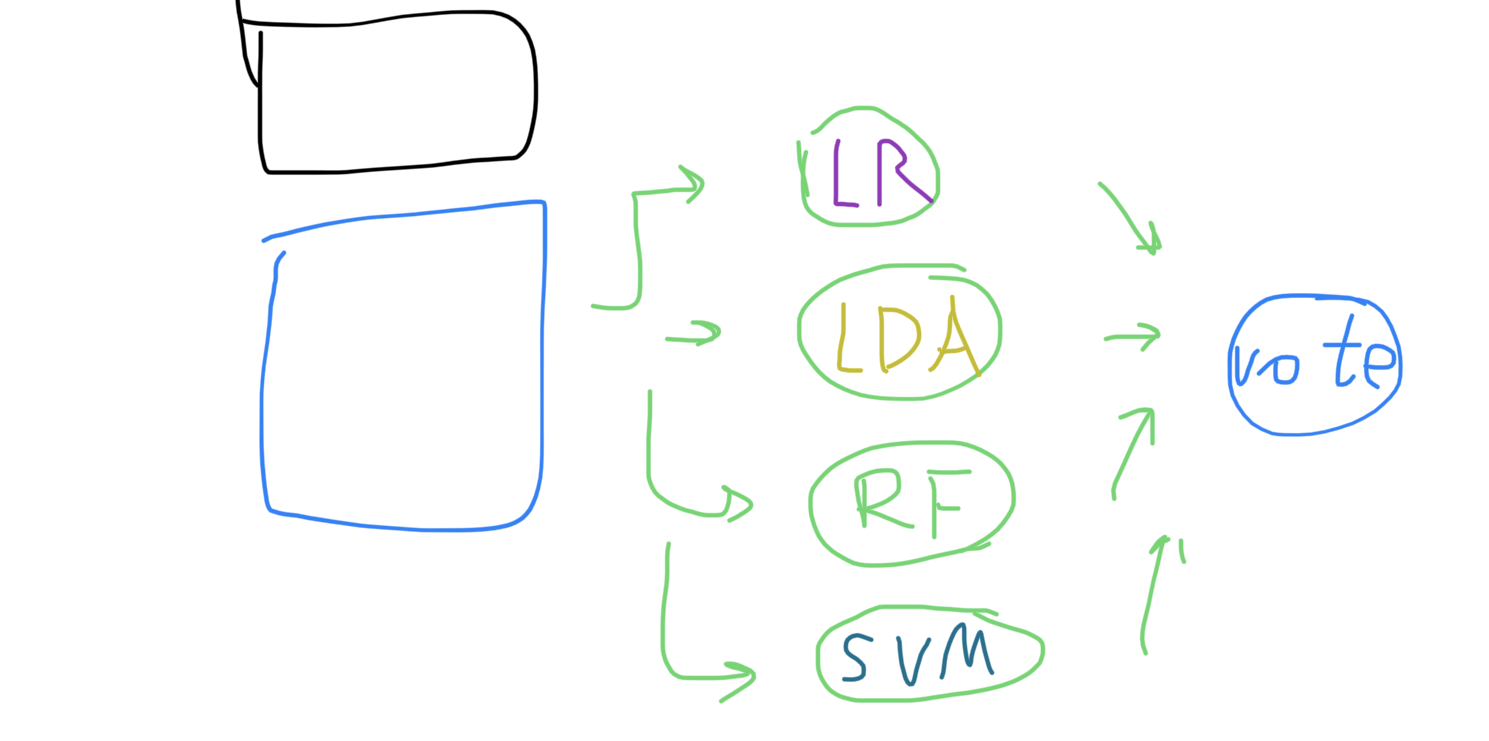

In [11]:
LDA_model = joblib.load('HER2_result/LDA_result/the_1619_LDA.Model')
RF_model = joblib.load('HER2_result/RF_result/the_55_RF.Model')

#### read SVM model

In [13]:
linear_SVM = load_SVM_model(seed=seed_linear,kernel='linear',C=1,data=data)
rbf_SVM = load_SVM_model(seed=seed_rbf,kernel='rbf',C=1,data=data)

NameError: name 'seed_linear' is not defined

## PREDICT

In [18]:
model_ls = [LDA_model,RF_model]
pre_ls = [data_pre[0],data_pre[2]]

In [21]:
y=np.stack([model_ls[i]._model.predict(pre_ls[i]) for i in range(2)]).T

In [46]:
to_predict.loc[:,'HER2_result'] = y[:,1]

In [49]:
to_predict.loc[:,['HER2_result']].to_csv('HER2_result/HER2_predict_result.csv')